# Análisis de los 25 retailers más grandes de Estados Unidos

Por Harry Vargas - Data Analyst / Data Scientist

In [51]:
# Importar librerías a emplear

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [25]:
sns.set_theme(context='notebook',palette='magma')

In [2]:
# Cargar archivo como dataframe
retail = pd.read_csv('/work/retail/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv')
retail

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [3]:
retail.dtypes

Company                object
Sales                   int64
Stores                float64
Sales/Avg. Store      float64
Store Count Growth    float64
Category               object
dtype: object

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


In [5]:
retail.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

Se puede evidenciar una distribución asimétrica para las ventas, debido a la presencia de valores atípicos mayores que la media. Walmart es la compañia con valores de Ventas muy superior al resto. registra ventas por 658119 USD. Lo que es más de 6 veces más que el resto de las empresas de estudio. Para que el promedio de Ventas tenga sentido y sea representativo es necesario no tener en consideración el aporte de Walmart.

El promedio de ventas quitando la compañia dominante es de 46602 USD.

Promedio de la distribución completa: 71063.08
Promedio quitando Walmart: 46602.416667

<AxesSubplot:xlabel='Sales', ylabel='Count'>

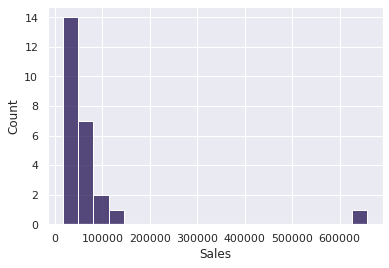

In [26]:
sns.histplot(data = retail, x = 'Sales')

In [20]:
# Walmart es el atípico con mayores ingresos por Ventas del dataset con un valor de 658.119 dólares

retail.sort_values(by = ['Sales'], ascending = False)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [79]:
# Calculo del promedio quitando dato atipico Walmart

print('Promedio de la distribución completa: {:.0f} USD'.format(retail['Sales'].mean()))
print('Promedio quitando Walmart: {:.0f} USD'.format(retail['Sales'].sort_values(ascending = False)[1:25].mean()))

Promedio de la distribución completa: 71063 USD
Promedio quitando Walmart: 46602 USD


In [76]:
type()

numpy.float64

In [18]:
# Otra forma de calcular el promedio usando numpy

np.sort(np.array(retail['Sales']))[0:24].mean()

46602.416666666664

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Al graficar la cantidad de tiendas en función de las Ventas se puede obsevar un dato fuera de tendencia, de nuevo Walmart se comporta como un atípico, para poder generar conclusiones validas vamos a realizar el análisis de correlación quitando este registro.

<AxesSubplot:xlabel='Stores', ylabel='Sales'>

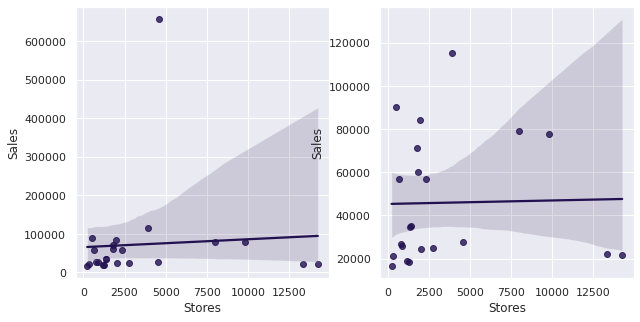

In [57]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.regplot(data = retail, x = 'Stores', y = 'Sales', ax = ax[0])
sns.regplot(data = retail_2, x = 'Stores', y = 'Sales',ax = ax[1])

In [60]:
# Eliminar Walmart, dato atípico en relación entre Tiendas y Ventas

retail_2 = retail.drop(index=0)


In [82]:
fig2 = px.scatter(retail, x = 'Stores',y= 'Sales', hover_name='Company')
fig2.show()

In [67]:
print('Coeficiente de correlación de Pearson datos completos: {:.4f}'.format(retail['Sales'].corr(retail['Stores'], method='pearson')))

print('Coeficiente de correlación de Pearson quitando Walmart: {:.4f}'.format(retail_2['Sales'].corr(retail_2['Stores'], method='pearson')))

Coeficiente de correlación de Pearson datos completos: 0.0633
Coeficiente de correlación de Pearson quitando Walmart: 0.0229


### 5. ¿Cuál es el rango que existe entre las ventas?

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [9]:
retail.groupby('')

## III. Tus propias preguntas

### 10. Pregunta

### 11. Pregunta

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ba04528-a318-4215-a2e2-655bbb58b00e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>